In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
NVDA_stock_data=pd.read_csv("NVDA (1).csv", index_col='Date')
NVDA_stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,46.337502,47.275002,46.020000,47.117500,46.797504,27993600
2019-04-23,47.250000,47.982498,47.152500,47.667500,47.343765,34685600
2019-04-24,47.772499,48.202499,47.160000,47.792500,47.467915,31820400
2019-04-25,47.387501,47.612499,45.924999,46.727501,46.410149,49929600
2019-04-26,45.177502,45.222500,43.325001,44.522499,44.220123,86898800
...,...,...,...,...,...,...
2024-04-16,864.330017,881.179993,860.640015,874.150024,874.150024,37045300
2024-04-17,883.400024,887.750000,839.500000,840.349976,840.349976,49540000
2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000


In [3]:
y = NVDA_stock_data['Close']
X = NVDA_stock_data[['Open', 'High', 'Low']]

In [4]:
NVDA_y_target = NVDA_stock_data['Close']
NVDA_X_feat = NVDA_stock_data.iloc[:, 0:3]

In [5]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)
y= y.values.reshape(-1,1)
y_scaled =scaler.fit_transform(y)


In [6]:
# Fit and transform the feature data
NVDA_X_ft = scaler.fit_transform(NVDA_X_feat)
# Convert the transformed feature data back to a pandas DataFrame
NVDA_X_feat = pd.DataFrame(data=NVDA_X_ft, columns=NVDA_X_feat.columns, index=NVDA_X_feat.index)


In [7]:
# Fit and transform the target data
# Since `NVDA_y_target` is a pandas Series, reshape it to a 2D array to fit and transform
NVDA_y_target_reshaped = NVDA_y_target.values.reshape(-1, 1)
NVDA_y_target_scaled = scaler.fit_transform(NVDA_y_target_reshaped)
# Convert the transformed target data back to a pandas Series
NVDA_y_target = pd.Series(NVDA_y_target_scaled.flatten(), index=NVDA_y_target.index)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)


In [9]:
length=10
model4 = Sequential([
    LSTM(64, input_shape=(length, 3), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])

In [10]:
model5 = Sequential([
    LSTM(64, input_shape=(length,3), return_sequences=True),
    LSTM(32, return_sequences=False),  
    Dense(1)  
])

In [11]:
# Split data into training and validation sets
train_size4 = int(0.2 * len(NVDA_stock_data))
train_X_feat4 = NVDA_X_feat[:train_size4]
train_y_target4 = NVDA_y_target[:train_size4]
val_X_feat4 = NVDA_X_feat[train_size4:]
val_y_target4 = NVDA_y_target[train_size4:]

In [12]:
# Split data into training and validation sets
train_size5 = int(0.2 * len(NVDA_stock_data))
train_X_feat5 = NVDA_X_feat[:train_size5]
train_y_target5 = NVDA_y_target[:train_size5]
val_X_feat5 = NVDA_X_feat[train_size5:]
val_y_target5 = NVDA_y_target[train_size5:]

In [13]:
train_generator4 = TimeseriesGenerator(train_X_feat4, train_y_target4, length=length, batch_size=1)
val_generator4 = TimeseriesGenerator(val_X_feat4, val_y_target4, length=length, batch_size=1)

In [14]:
train_generator5 = TimeseriesGenerator(X_train, y_train, length=length, batch_size=1)
val_generator5 = TimeseriesGenerator(X_test, y_test, length=length, batch_size=1)

In [15]:
model5.compile(optimizer='adam', loss='mse')
model5.fit(train_generator5, validation_data=val_generator5, epochs=10)

Epoch 1/10
998/998 [==============================] - 13s 10ms/step - loss: 1.0416 - val_loss: 0.9026
Epoch 2/10
998/998 [==============================] - 9s 9ms/step - loss: 1.0352 - val_loss: 0.9113
Epoch 3/10
998/998 [==============================] - 9s 9ms/step - loss: 1.0360 - val_loss: 0.9044
Epoch 4/10
998/998 [==============================] - 9s 9ms/step - loss: 1.0339 - val_loss: 0.9079
Epoch 5/10
998/998 [==============================] - 10s 10ms/step - loss: 1.0349 - val_loss: 0.9081
Epoch 6/10
998/998 [==============================] - 10s 10ms/step - loss: 1.0298 - val_loss: 0.9331
Epoch 7/10
998/998 [==============================] - 10s 10ms/step - loss: 1.0354 - val_loss: 0.9143
Epoch 8/10
998/998 [==============================] - 10s 10ms/step - loss: 1.0310 - val_loss: 0.9095
Epoch 9/10
998/998 [==============================] - 9s 9ms/step - loss: 1.0291 - val_loss: 0.9167
Epoch 10/10
998/998 [==============================] - 10s 10ms/step - loss: 1.0280 - val_

In [16]:
pred_y5 = model5.predict(val_generator4)
pred_y5 = pred_y5.reshape(-1)

C:\Users\hamza\anaconda3\envs\tf\lib\site-packages\keras\preprocessing\sequence.py:189: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


998/998 [==============================] - 2s 2ms/step


In [17]:
NVDA_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in NVDA_stock_data.index.values]

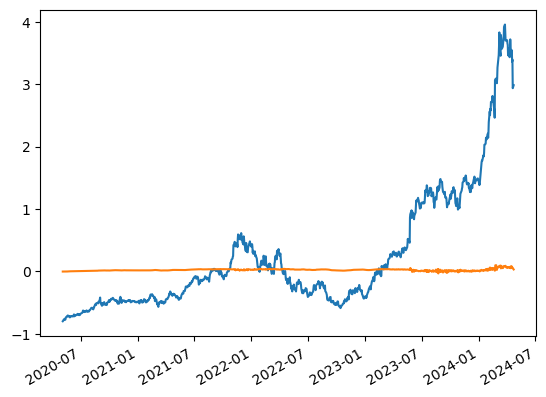

In [23]:
plt.plot(NVDA_dates[train_size4+10:], val_y_target4[10:], label="")
plt.plot(NVDA_dates[train_size4+10: ], pred_y5, label="")
plt.gcf().autofmt_xdate()